In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('zuu crew scores.csv')
df = df[df['CourseName'] == 'Foundations of ML']
df.head(5)

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


Standardization

In [38]:
X_raw = df['TotalHours'].values.reshape(-1, 1)
X = ((X_raw - np.mean(X_raw)) / np.std(X_raw)).flatten()
y = df['CapstoneScore'].values


In [39]:

# X = df["TotalHours"].values.reshape(-1, 1)   # cast to float explicitly
# y = df["CapstoneScore"].values

# # Standardize X to mean 0, std 1
# X = (X - X.mean()) / X.std()

# print("X mean:", X.mean(), "X std:", X.std())

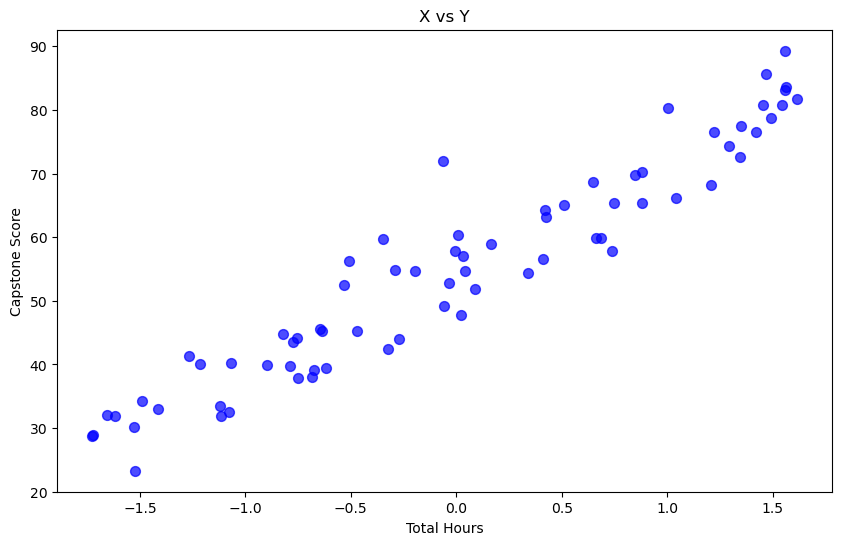

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.7, color='blue', s=50)
plt.xlabel('Total Hours')
plt.ylabel('Capstone Score')
plt.title('X vs Y')
plt.show()

In [41]:
def compute_cost(X, y, beta_0, beta_1):
    m = len(y)
    y_hat = beta_0 + beta_1 * X
    cost = (1/(2*m)) * np.sum((y_hat - y) ** 2)
    return cost

def compute_gradients(X, y, beta_0, beta_1):
    m = len(y)
    y_hat = beta_0 + beta_1 * X
    grad_beta_0 = (1/m) * np.sum(y_hat - y)
    grad_beta_1 = (1/m) * np.sum((y_hat - y) * X)
    return grad_beta_0, grad_beta_1

def gradient_descent(X, y, learning_rate, num_itr):
    beta_0 = np.random.randn()
    beta_1 = np.random.randn()

    print(f"beta values:01. beta_0 - {beta_0} , 02. beta_1 - {beta_1}")
    cost_history = []

    for i in range(num_itr):
        grad_beta_0, grad_beta_1 = compute_gradients(X, y, beta_0, beta_1)
        beta_0 =  beta_0 - learning_rate * grad_beta_0
        beta_1 = beta_1 - learning_rate * grad_beta_1

        cost = compute_cost(X, y, beta_0, beta_1)
        cost_history.append(cost)

        if i % 1000 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")

    return beta_0, beta_1, cost_history

In [42]:
def predict(X, beta_0, beta_1):
    return beta_0 + beta_1 * X

In [43]:
learning_rates = [0.00001, 0.001, 0.1, 1.0]
iteration_counts = [1000, 5000, 10000]
results = {}

for lr in learning_rates:
    for num_itr in iteration_counts:
        print(f"Training with α = {lr} , iterations = {num_itr}")
        beta_0, beta_1, cost_history = gradient_descent(X, y, learning_rate=lr, num_itr=num_itr)
        results[(lr,num_itr)] = {
            "beta_0":  beta_0 ,
            "beta_1":   beta_1,
            "cost_history": cost_history
        }
        print()

Training with α = 1e-05 , iterations = 1000
beta values:01. beta_0 - -0.0024446073561239486 , 02. beta_1 - -1.2937147492055465
Iteration 0: Cost = 1683.1608

Training with α = 1e-05 , iterations = 5000
beta values:01. beta_0 - -0.4344665134645968 , 02. beta_1 - 1.0346429538902573
Iteration 0: Cost = 1669.1579
Iteration 1000: Cost = 1636.3527
Iteration 2000: Cost = 1604.1970
Iteration 3000: Cost = 1572.6781
Iteration 4000: Cost = 1541.7833

Training with α = 1e-05 , iterations = 10000
beta values:01. beta_0 - 0.3451726038364251 , 02. beta_1 - 0.767314313539171
Iteration 0: Cost = 1630.2359
Iteration 1000: Cost = 1598.2013
Iteration 2000: Cost = 1566.8011
Iteration 3000: Cost = 1536.0227
Iteration 4000: Cost = 1505.8537
Iteration 5000: Cost = 1476.2821
Iteration 6000: Cost = 1447.2961
Iteration 7000: Cost = 1418.8840
Iteration 8000: Cost = 1391.0346
Iteration 9000: Cost = 1363.7365

Training with α = 0.001 , iterations = 1000
beta values:01. beta_0 - 1.254246510785689 , 02. beta_1 - -0.5

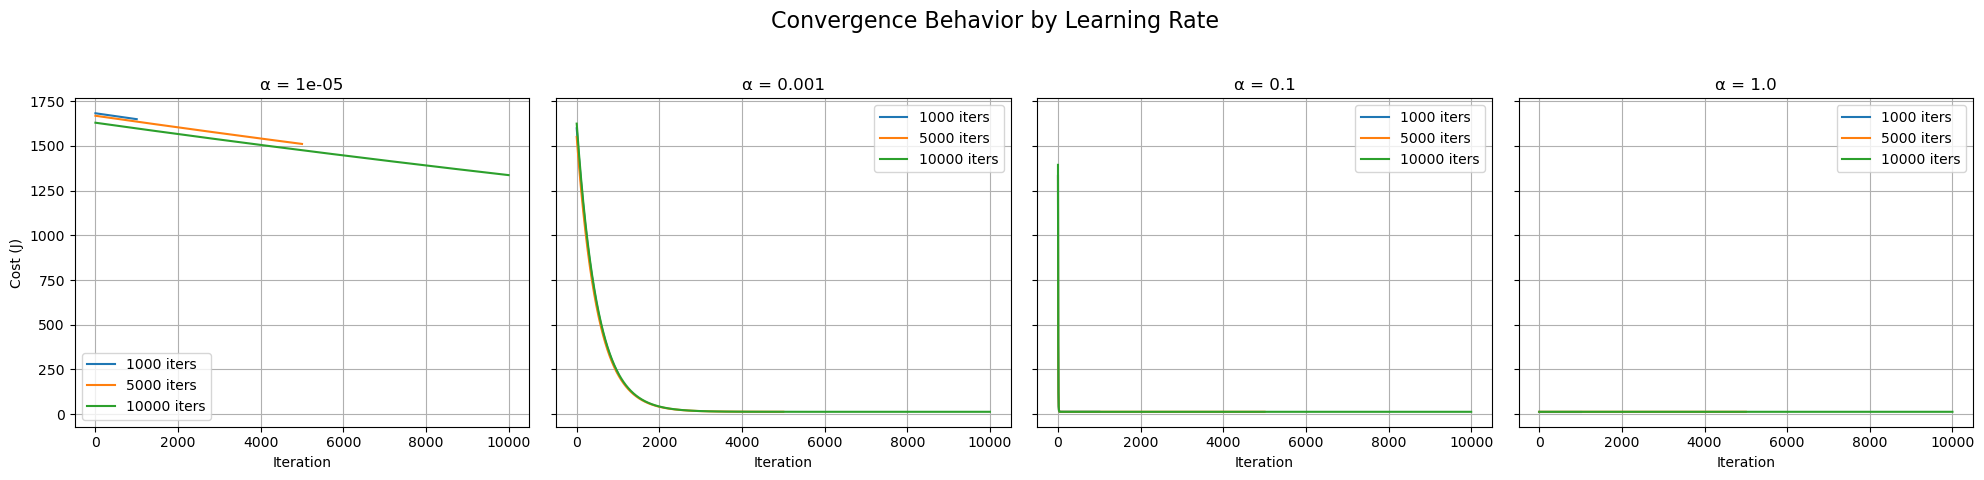

In [44]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True) 

for i, lr in enumerate(learning_rates):
    ax = axs[i]
    for num_itr in sorted(iteration_counts):
        key = (lr, num_itr)
        if key in results:
            cost = results[key]['cost_history']
            ax.plot(range(len(cost)), cost, label=f'{num_itr} iters')

    ax.set_title(f'α = {lr}')
    ax.set_xlabel('Iteration')
    if i == 0:
        ax.set_ylabel('Cost (J)')
    ax.legend()
    ax.grid(True)

plt.suptitle("Convergence Behavior by Learning Rate", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

In [45]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot


In [47]:
summary_rows = []

for (lr, num_itr), result in results.items():
    b0 = result['beta_0']
    b1 = result['beta_1']
    cost_history = result['cost_history']
    y_pred = predict(X, b0, b1)

    summary_rows.append({
        "Learning Rate (α)": lr,
        "Iterations": num_itr,
        "β₀": round(b0, 4),
        "β₁": round(b1, 4),
        "Final Cost": round(cost_history[-1], 4),
        "MSE": round(mse(y, y_pred), 4),
        "MAE": round(mae(y, y_pred), 4),
        "RMSE": round(rmse(y, y_pred), 4),
        "R²": round(r2(y, y_pred), 4)
    })

summary_df = pd.DataFrame(summary_rows)
summary_df = summary_df.sort_values(by="Final Cost").reset_index(drop=True)
summary_df

,Learning Rate (α),Iterations,β₀,β₁,Final Cost,MSE,MAE,RMSE,R²
0,0.10000,1000,55.1083,16.1504,12.4464,24.8928,3.9351,4.9893,0.9129
1,0.10000,5000,55.1083,16.1504,12.4464,24.8928,3.9351,4.9893,0.9129
2,0.00100,10000,55.1058,16.1498,12.4464,24.8928,3.9354,4.9893,0.9129
3,0.10000,10000,55.1083,16.1504,12.4464,24.8928,3.9351,4.9893,0.9129
4,1.00000,10000,55.1083,16.1504,12.4464,24.8928,3.9351,4.9893,0.9129
5,1.00000,5000,55.1083,16.1504,12.4464,24.8928,3.9351,4.9893,0.9129
6,1.00000,1000,55.1083,16.1504,12.4464,24.8928,3.9351,4.9893,0.9129
7,0.00100,5000,54.7526,16.0376,12.5160,25.0321,3.9759,5.0032,0.9124
8,0.00100,1000,35.3064,10.0068,227.3759,454.7518,19.8019,21.3249,-0.5916
9,0.00001,10000,5.5566,2.2312,1337.0056,2674.0111,49.5517,51.7108,-8.3586


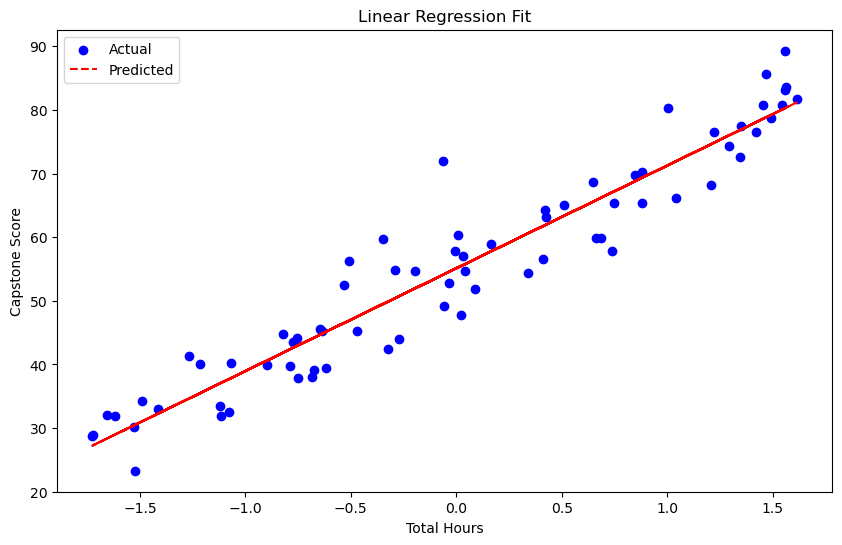

In [48]:
# Plot regression line
y_pred = predict(X, beta_0, beta_1)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linestyle='--', label='Predicted')
plt.xlabel("Total Hours")
plt.ylabel("Capstone Score")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()


Training with α = 1e-05, Iterations = 1000
beta values:01. beta_0 - -0.6582612560899231 , 02. beta_1 - 1.4054829707756347
Iteration 0: Cost = 1676.0762
Iteration 1000: Cost = 1643.1340
Iteration 2000: Cost = 1610.8440
Iteration 3000: Cost = 1579.1935
Iteration 4000: Cost = 1548.1697
Iteration 5000: Cost = 1517.7602
Iteration 6000: Cost = 1487.9528
Iteration 7000: Cost = 1458.7357
Iteration 8000: Cost = 1430.0971
Iteration 9000: Cost = 1402.0256
Final Cost: 1374.5372
β₀ = 4.6487, β₁ = 2.8087


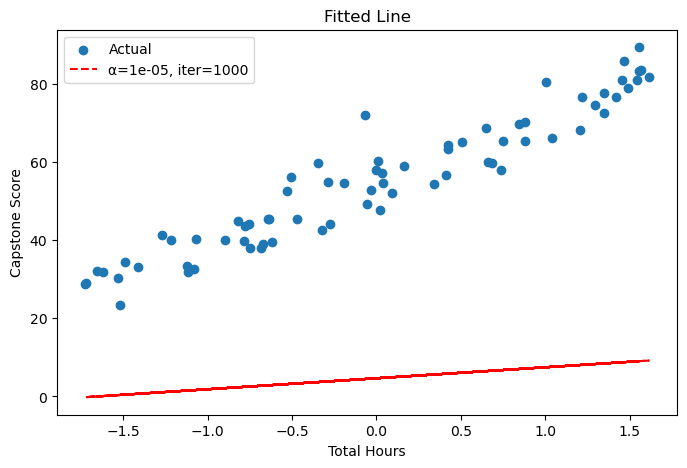


Training with α = 1e-05, Iterations = 5000
beta values:01. beta_0 - -0.41644244833870886 , 02. beta_1 - -0.16543685250015913
Iteration 0: Cost = 1687.0168
Iteration 1000: Cost = 1653.8580
Iteration 2000: Cost = 1621.3557
Iteration 3000: Cost = 1589.4970
Iteration 4000: Cost = 1558.2691
Iteration 5000: Cost = 1527.6596
Iteration 6000: Cost = 1497.6563
Iteration 7000: Cost = 1468.2470
Iteration 8000: Cost = 1439.4201
Iteration 9000: Cost = 1411.1639
Final Cost: 1383.4948
β₀ = 4.8675, β₁ = 1.3872


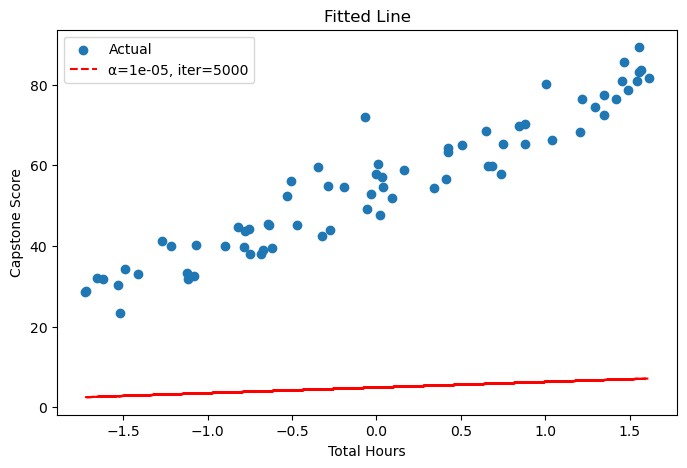


Training with α = 1e-05, Iterations = 10000
beta values:01. beta_0 - 0.9004111398581904 , 02. beta_1 - -0.8803047326508238
Iteration 0: Cost = 1626.6863
Iteration 1000: Cost = 1594.7220
Iteration 2000: Cost = 1563.3907
Iteration 3000: Cost = 1532.6798
Iteration 4000: Cost = 1502.5770
Iteration 5000: Cost = 1473.0703
Iteration 6000: Cost = 1444.1479
Iteration 7000: Cost = 1415.7982
Iteration 8000: Cost = 1388.0098
Iteration 9000: Cost = 1360.7717
Final Cost: 1334.0994
β₀ = 6.0590, β₁ = 0.7404


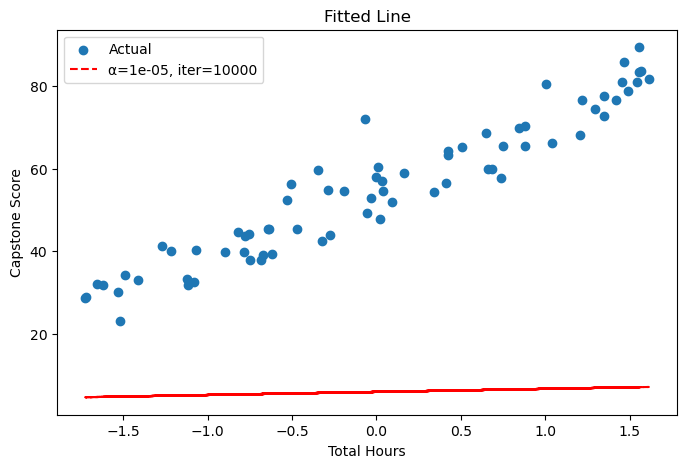


Training with α = 0.001, Iterations = 1000
beta values:01. beta_0 - 1.3886275386572966 , 02. beta_1 - -0.7931851487094282
Iteration 0: Cost = 1595.7213
Iteration 1000: Cost = 226.5051
Iteration 2000: Cost = 41.3871
Iteration 3000: Cost = 16.3592
Iteration 4000: Cost = 12.9754
Iteration 5000: Cost = 12.5179
Iteration 6000: Cost = 12.4561
Iteration 7000: Cost = 12.4477
Iteration 8000: Cost = 12.4466
Iteration 9000: Cost = 12.4464
Final Cost: 12.4464
β₀ = 55.1059, β₁ = 16.1497


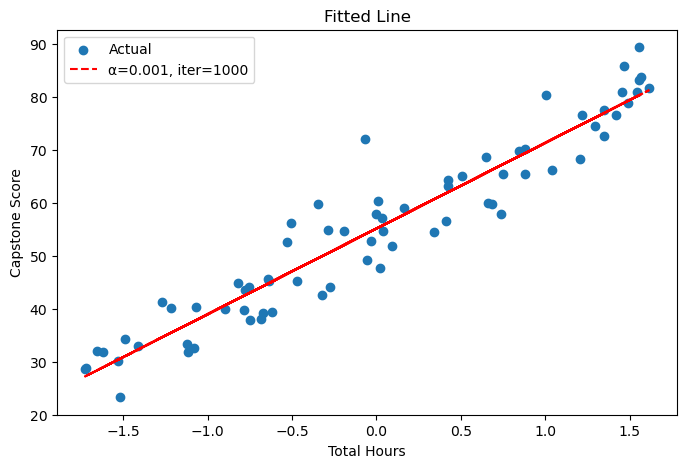


Training with α = 0.001, Iterations = 5000
beta values:01. beta_0 - -0.41104394834608077 , 02. beta_1 - -1.751043051375136
Iteration 0: Cost = 1710.4770
Iteration 1000: Cost = 242.0200
Iteration 2000: Cost = 43.4847
Iteration 3000: Cost = 16.6428
Iteration 4000: Cost = 13.0138
Iteration 5000: Cost = 12.5231
Iteration 6000: Cost = 12.4568
Iteration 7000: Cost = 12.4478
Iteration 8000: Cost = 12.4466
Iteration 9000: Cost = 12.4464
Final Cost: 12.4464
β₀ = 55.1058, β₁ = 16.1496


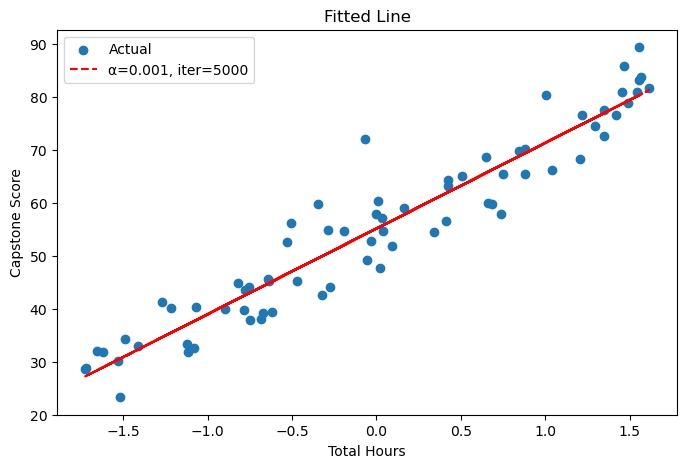


Training with α = 0.001, Iterations = 10000
beta values:01. beta_0 - 0.8370130040998695 , 02. beta_1 - 0.4300429080795596
Iteration 0: Cost = 1605.5087
Iteration 1000: Cost = 227.8283
Iteration 2000: Cost = 41.5660
Iteration 3000: Cost = 16.3834
Iteration 4000: Cost = 12.9787
Iteration 5000: Cost = 12.5184
Iteration 6000: Cost = 12.4561
Iteration 7000: Cost = 12.4477
Iteration 8000: Cost = 12.4466
Iteration 9000: Cost = 12.4464
Final Cost: 12.4464
β₀ = 55.1059, β₁ = 16.1497


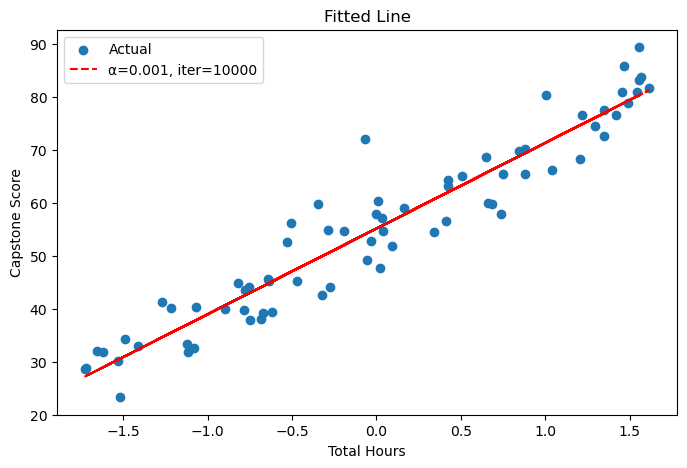


Training with α = 0.1, Iterations = 1000
beta values:01. beta_0 - 0.029741212985276853 , 02. beta_1 - -0.636203717770859
Iteration 0: Cost = 1355.2004
Iteration 1000: Cost = 12.4464
Iteration 2000: Cost = 12.4464
Iteration 3000: Cost = 12.4464
Iteration 4000: Cost = 12.4464
Iteration 5000: Cost = 12.4464
Iteration 6000: Cost = 12.4464
Iteration 7000: Cost = 12.4464
Iteration 8000: Cost = 12.4464
Iteration 9000: Cost = 12.4464
Final Cost: 12.4464
β₀ = 55.1083, β₁ = 16.1504


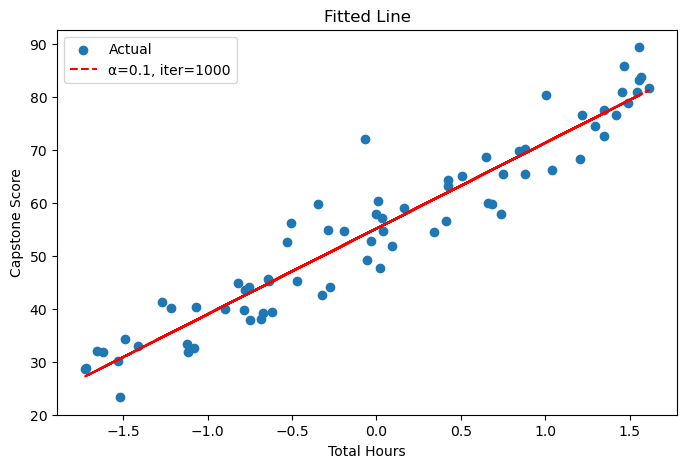


Training with α = 0.1, Iterations = 5000
beta values:01. beta_0 - 3.021052686744845 , 02. beta_1 - 1.2490632107428918
Iteration 0: Cost = 1201.1762
Iteration 1000: Cost = 12.4464
Iteration 2000: Cost = 12.4464
Iteration 3000: Cost = 12.4464
Iteration 4000: Cost = 12.4464
Iteration 5000: Cost = 12.4464
Iteration 6000: Cost = 12.4464
Iteration 7000: Cost = 12.4464
Iteration 8000: Cost = 12.4464
Iteration 9000: Cost = 12.4464
Final Cost: 12.4464
β₀ = 55.1083, β₁ = 16.1504


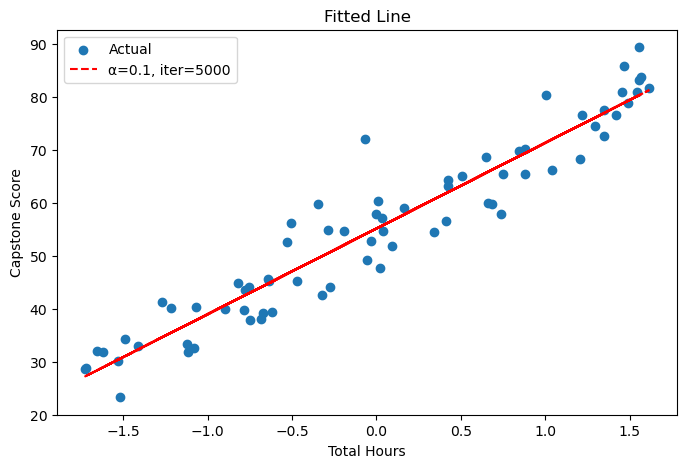


Training with α = 0.1, Iterations = 10000
beta values:01. beta_0 - -1.219790386040008 , 02. beta_1 - 0.1361292957393435
Iteration 0: Cost = 1401.3190
Iteration 1000: Cost = 12.4464
Iteration 2000: Cost = 12.4464
Iteration 3000: Cost = 12.4464
Iteration 4000: Cost = 12.4464
Iteration 5000: Cost = 12.4464
Iteration 6000: Cost = 12.4464
Iteration 7000: Cost = 12.4464
Iteration 8000: Cost = 12.4464
Iteration 9000: Cost = 12.4464
Final Cost: 12.4464
β₀ = 55.1083, β₁ = 16.1504


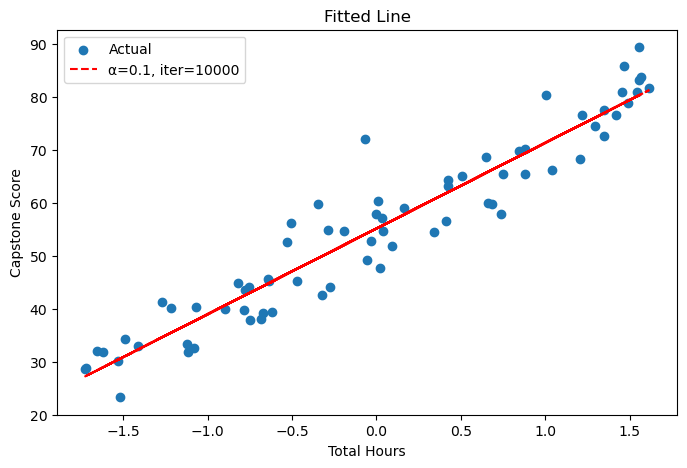


Training with α = 1.0, Iterations = 1000
beta values:01. beta_0 - 1.393192340707996 , 02. beta_1 - 1.3246468127768745
Iteration 0: Cost = 12.4464
Iteration 1000: Cost = 12.4464
Iteration 2000: Cost = 12.4464
Iteration 3000: Cost = 12.4464
Iteration 4000: Cost = 12.4464
Iteration 5000: Cost = 12.4464
Iteration 6000: Cost = 12.4464
Iteration 7000: Cost = 12.4464
Iteration 8000: Cost = 12.4464
Iteration 9000: Cost = 12.4464
Final Cost: 12.4464
β₀ = 55.1083, β₁ = 16.1504


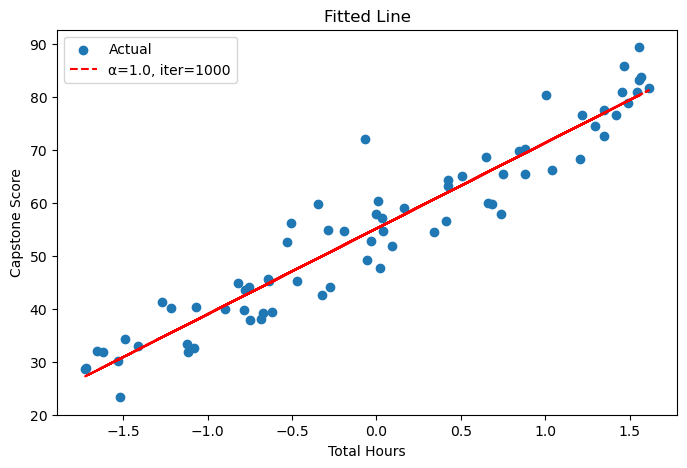


Training with α = 1.0, Iterations = 5000
beta values:01. beta_0 - 0.1077070842019533 , 02. beta_1 - 0.14402759577701213
Iteration 0: Cost = 12.4464
Iteration 1000: Cost = 12.4464
Iteration 2000: Cost = 12.4464
Iteration 3000: Cost = 12.4464
Iteration 4000: Cost = 12.4464
Iteration 5000: Cost = 12.4464
Iteration 6000: Cost = 12.4464
Iteration 7000: Cost = 12.4464
Iteration 8000: Cost = 12.4464
Iteration 9000: Cost = 12.4464
Final Cost: 12.4464
β₀ = 55.1083, β₁ = 16.1504


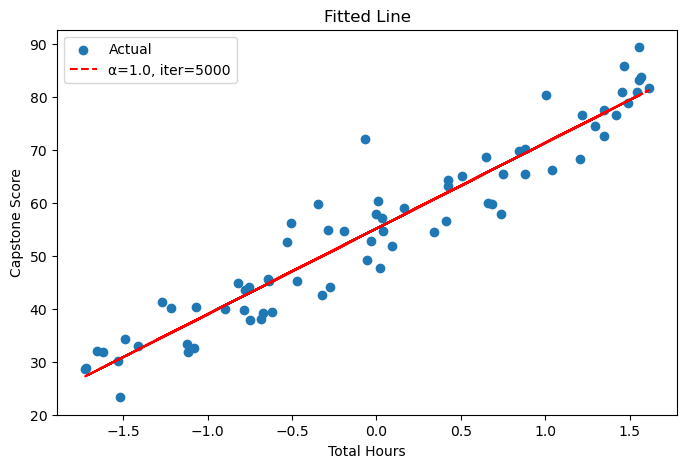


Training with α = 1.0, Iterations = 10000
beta values:01. beta_0 - 0.09107260082080845 , 02. beta_1 - -1.207468757727404
Iteration 0: Cost = 12.4464
Iteration 1000: Cost = 12.4464
Iteration 2000: Cost = 12.4464
Iteration 3000: Cost = 12.4464
Iteration 4000: Cost = 12.4464
Iteration 5000: Cost = 12.4464
Iteration 6000: Cost = 12.4464
Iteration 7000: Cost = 12.4464
Iteration 8000: Cost = 12.4464
Iteration 9000: Cost = 12.4464
Final Cost: 12.4464
β₀ = 55.1083, β₁ = 16.1504


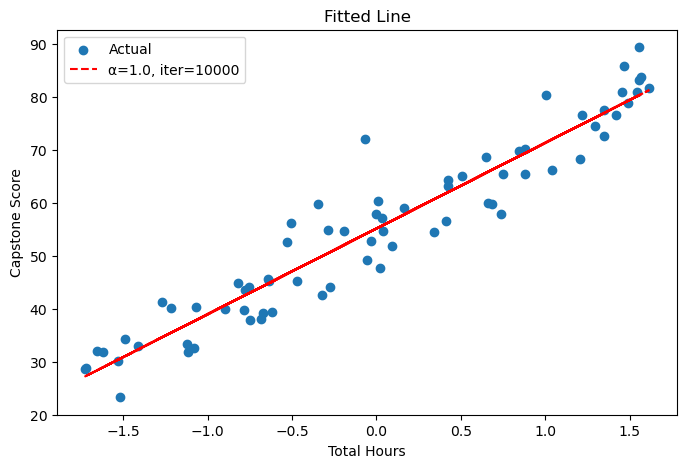

In [51]:
learning_rates = [0.00001, 0.001, 0.1, 1.0]
iteration_counts = [1000, 5000, 10000]

for lr in learning_rates:
    for num_iter in iteration_counts:
        print(f"\nTraining with α = {lr}, Iterations = {num_iter}")
        b0, b1, cost_hist = gradient_descent(X, y, learning_rate=lr, num_itr=num_itr)
        y_pred = predict(X, b0, b1)

        print(f"Final Cost: {cost_hist[-1]:.4f}")
        print(f"β₀ = {b0:.4f}, β₁ = {b1:.4f}")

        plt.figure(figsize=(8, 5))
        plt.scatter(X, y, label='Actual')
        plt.plot(X, y_pred, 'r--', label=f'α={lr}, iter={num_iter}')
        plt.title("Fitted Line")
        plt.xlabel("Total Hours")
        plt.ylabel("Capstone Score")
        plt.legend()
        plt.show()
